# Predicting heart disease with ML

Using Python-based ML and data science libraries to predict hearth disease based on their medical attributes



**Taking the following approach**

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> Given clinical parameters about a patient, can we predict where they have hearth disease or not

## 2. Data
Data comes in the form of a .csv file.

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation 
> An attempt at reaching 95% accuracy. If metric passed, proof of concept successful

## 4. Features

### Data Dictionary

- `age`: Age in years
- `sex`: Sex (1 = male; 0 = female)
- `cp`: Chest pain type
   - 0: Typical angina: chest pain related decrease blood supply to the heart
   - 1: Atypical angina: chest pain not related to heart
   - 2: Non-anginal pain: typically esophageal spasms (non heart related)
   - 3: Asymptomatic: chest pain not showing signs of disease
- `trestbps`: Resting blood pressure (in mm Hg on admission to the hospital). Anything above 130-140 is typically cause for concern
- `chol`: Serum cholestoral in mg/dl (serum = LDL + HDL + .2 * triglycerides). Above 200 is cause for concern
- `fbs`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false). '>126' mg/dL signals diabetes
- `restecg`: Resting electrocardiographic results
   - 0: Nothing to note
   - 1: ST-T Wave abnormality can range from mild symptoms to severe problems, signals non-normal heart beat
   - 2: Possible or definite left ventricular hypertrophy. Enlarged heart's main pumping chamber
- `thalach`: Maximum heart rate achieved
- `exang`: Exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest. Looks at stress of heart during exercise. Unhealthy heart will stress more
- `slope`: The slope of the peak exercise ST segment
   - 0: Upsloping: better heart rate with exercise (uncommon)
   - 1: Flatsloping: minimal change (typical healthy heart)
   - 2: Downslopins: signs of unhealthy heart
- `ca`: Number of major vessels (0-3) colored by flourosopy. Colored vessel means the doctor can see the blood passing through. The more blood movement the better (no clots)
- `thal`: Thalium stress result
   - 1,3: normal
   - 6: fixed defect: used to be defect but ok now
   - 7: reversable defect: no proper blood movement when exercising
- `target`: Have disease or not (1=yes, 0=no) (= the predicted attribute)


# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models from sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

%matplotlib inline

# Load Data

In [6]:
df = pd.read_csv('data/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (exploratory data analysis, EDA)

**Finding out more about the data and become a subject matter expert on the dataset**

1. What questions to solve?
2. What kind of data and how to treat different types?
3. What's missing and to how to solve it?
4. Are there outliers and where, are they a problem?
5. Can adding, changing or removing features get more out of the data?

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


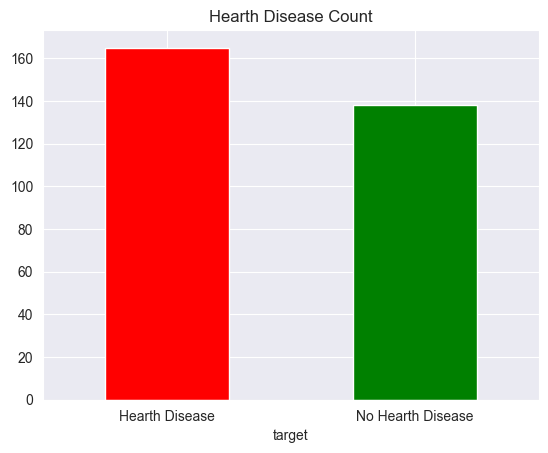

In [25]:
# How many of each target class in DataFrame
df['target'].value_counts()
values = df['target'].value_counts()

bar_plot = values.plot(kind='bar', color=['red', 'green'])
bar_plot.set_title('Hearth Disease Count')
bar_plot.set_xticklabels(['Hearth Disease', 'No Hearth Disease'])

plt.xticks(rotation='horizontal')

# Show the plot
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
# Any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Hearth Disease Frequency according to Sex

In [27]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

Data set is tilted towards males

In [29]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


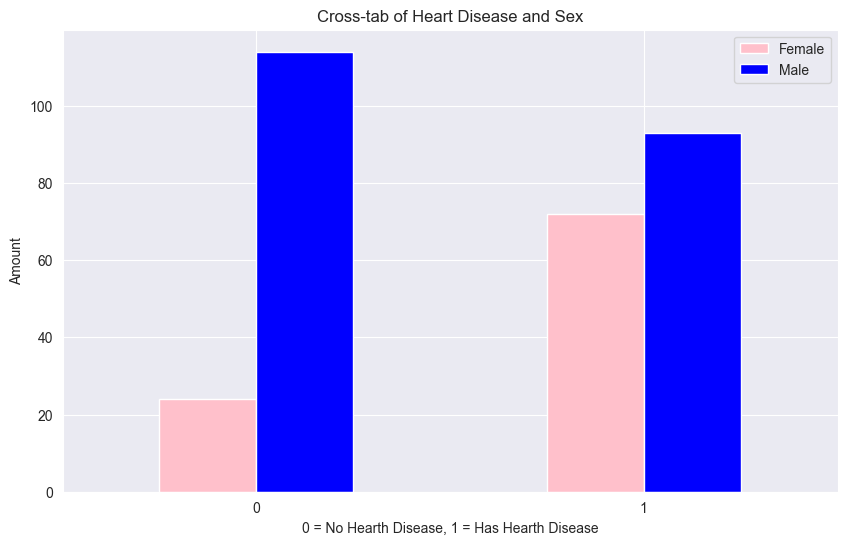

In [44]:
# Create a plot of the cross-tab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10, 6),
                                    color=['pink', 'blue'])
plt.title('Cross-tab of Heart Disease and Sex')
plt.xticks(rotation='horizontal')
plt.xlabel('0 = No Hearth Disease, 1 = Has Hearth Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male']);

In [45]:
df['thalach'].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64